# Problem 1 (30 points)

## Problem Description

In this problem you will implement polynomial linear least squares regression on two datasets, with and without regularization. Additionally, you will use gradient descent to optimize for the model parameters.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Print fitted model parameters `w` for the 4 models requested without regularization
- Print fitted model parameters `w` for the 2 models requested *with* $L_2$ regularization
- Print fitted model parameters `w` for the one model solved via gradient descent

Plots:
- 2 plots of each dataset along with the ground truth function
- 4 plots of the fitted function along with the respective data and ground truth function for LLS without regularization
- 2 plots of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization
- 1 plot of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization solved via gradient descent

Discussion:
- Discussion of challenges fitting complex models to small datasets
- Discussion of difference between the $L_2$ regularized model versus the standard model
- Discussion of whether gradient descent could get stuck in a local minimum
- Discussion of gradient descent results versus closed form results

#### Imports and Utility Functions:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gt_function():
    xt = np.linspace(0,1,101)
    yt = np.sin(2 *np.pi*xt)
    return xt, yt

def plot_data(x,y,xt,yt,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

## Load and visualize the data

The data is contained in `d10.npy` and `d100.npy` and can be loaded with `np.load()`. 

Store the data as:
- `x10` and `x100` (the first column of the data)
- `y10` and `y100` (the second column of the data)

Generate the ground truth function $f(x)=\textrm{sin}(2\pi x)$ using `xt, yt = gt_function()`.

Then visualize the each dataset with `plotxy(x,y,xt,yt,title)` with an appropriate title. You should generate two plots.

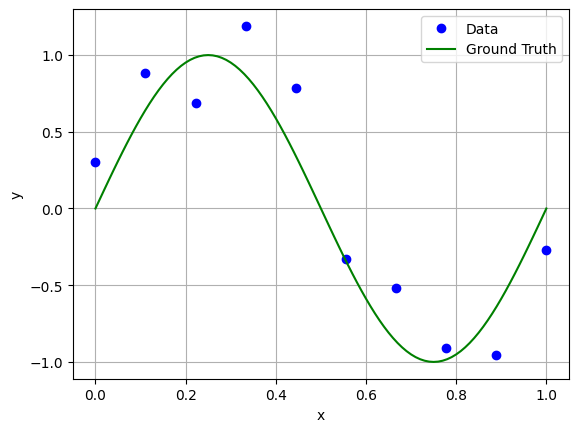

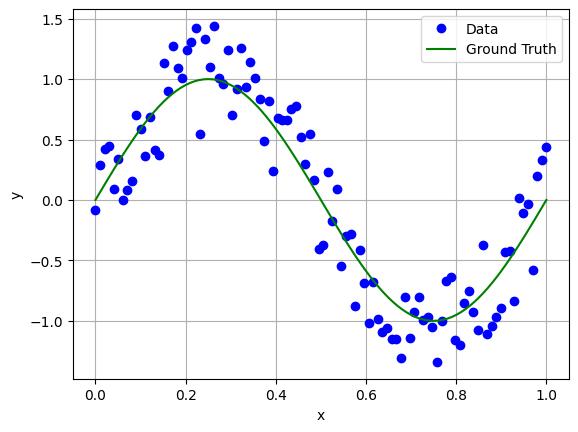

In [3]:
# YOUR CODE GOES HERE
d10 = np.load('d10.npy')
d100 = np.load('d100.npy')

x10,y10 = d10[:,0],d10[:,1]
x100,y100 = d100[:,0],d100[:,1]

xt,yt = gt_function()
plot_data(x10,y10,xt,yt,title=None)
plot_data(x100,y100,xt,yt,title=None)

## Implement polynomial linear regression

Now you will implement polynomial linear least squares regression without regularization using the closed form solution from lecture to compute the model parameters. You will consider the following 4 cases:

1. Data:  data10.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data: data100.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

[[-1.09384447]
 [-0.66283292]
 [ 0.80276877]]
[[ 0.12128272]
 [-2.04993418]
 [ 0.99435046]]
[[-3.91495548e+04]
 [ 1.67474612e+05]
 [-2.96002347e+05]
 [ 2.78781821e+05]
 [-1.50327937e+05]
 [ 4.63121529e+04]
 [-7.65098243e+03]
 [ 5.70103270e+02]
 [-8.43835656e+00]
 [ 2.99999530e-01]]
[[-2.21757782e+03]
 [ 1.15792903e+04]
 [-2.48687620e+04]
 [ 2.86930080e+04]
 [-1.95215334e+04]
 [ 8.13290444e+03]
 [-2.07020969e+03]
 [ 2.84954674e+02]
 [-1.18520402e+01]
 [ 2.71583131e-01]]


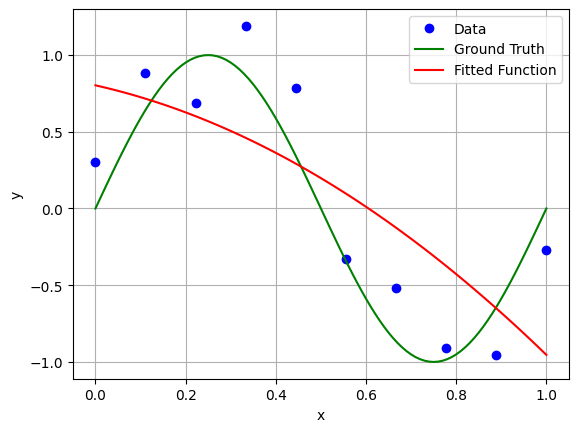

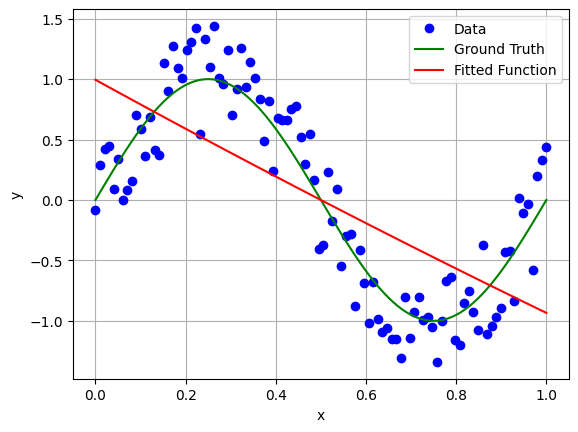

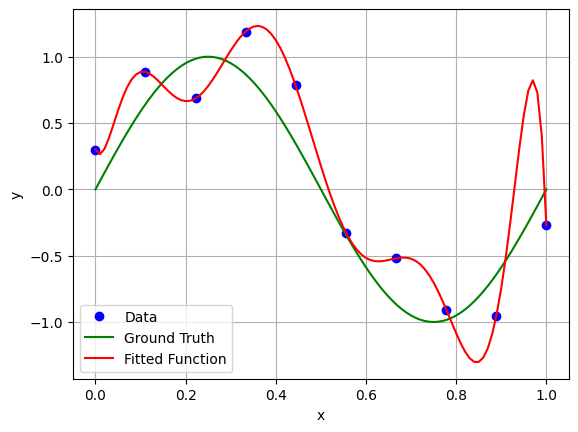

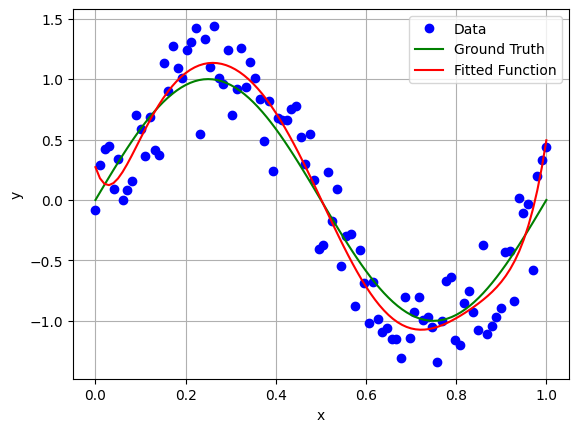

In [4]:
# YOUR CODE GOES HERE

def get_quadratic_design_matrix(x):
    # YOUR CODE GOES HERE
    # GENERATE A DESIGN MATRIX WITH 2ND ORDER FEATURES: X
    columns = np.array([[(x**2)],[x],[np.ones_like(x)]])
    X = np.concatenate(columns,axis=0)
    return X.T

def get_9th_design_matrix(x):
    # YOUR CODE GOES HERE
    # GENERATE A DESIGN MATRIX WITH 2ND ORDER FEATURES: X
    columns = np.array([[(x**9)],[(x**8)],[(x**7)],[(x**6)],[(x**5)],[(x**4)],[(x**3)],[(x**2)],[x],[np.ones_like(x)]])
    X = np.concatenate(columns,axis=0)
    return X.T



X_10_2 = get_quadratic_design_matrix(x10)
X_100_2 = get_quadratic_design_matrix(x100)
w_10_2 = np.linalg.inv(X_10_2.T @ X_10_2) @ X_10_2.T @ y10.reshape(-1,1)
w_100_2 = np.linalg.inv(X_100_2.T @ X_100_2) @ X_100_2.T @ y100.reshape(-1,1)
print(w_10_2)
print(w_100_2)

X_10_9 = get_9th_design_matrix(x10)
X_100_9 = get_9th_design_matrix(x100)
w_10_9 = np.linalg.inv(X_10_9.T @ X_10_9) @ X_10_9.T @ y10.reshape(-1,1)
w_100_9 = np.linalg.inv(X_100_9.T @ X_100_9) @ X_100_9.T @ y100.reshape(-1,1)
print(w_10_9)
print(w_100_9)


xr = np.linspace(0,1,101)
yr_10_2 = get_quadratic_design_matrix(xr) @ w_10_2
yr_100_2 = get_quadratic_design_matrix(xr) @ w_100_2
yr_10_9 = get_9th_design_matrix(xr) @ w_10_9
yr_100_9 = get_9th_design_matrix(xr) @ w_100_9

plot_model(x10,y10,xt,yt,xr,yr_10_2,title = None)
plot_model(x100,y100,xt,yt,xr,yr_100_2,title = None)
plot_model(x10,y10,xt,yt,xr,yr_10_9,title = None)
plot_model(x100,y100,xt,yt,xr,yr_100_9,title = None)



## Discussion:
When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?


### *Your answer goes here*
When sample size is too small, it can cause overfitting and ill-Conditioned design matrix in a complex model

## Implement polynomial linear regression with $L_2$ regularization

You will repeat the previous section, but this time using $L_2$ regularization. Your regularization term should be $\lambda w' \mathbb{I}_m w$, where $\lambda = e^{-10}$, and $\mathbb{I}_m$ is the modified identity matrix that masks out the bias term  from  regularization. 

You will consider only two cases:
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

[[-3.5338486 ]
 [-1.84896842]
 [ 2.29997278]
 [ 6.47141056]
 [ 6.80582425]
 [ 0.25321228]
 [-9.30526316]
 [-6.83132438]
 [ 5.10343135]
 [ 0.30633599]]
[[ 17.53893754]
 [-22.00647044]
 [-21.06911983]
 [  7.03985659]
 [ 33.82816171]
 [ 20.79696185]
 [-38.38285113]
 [ -5.43884905]
 [  8.07411308]
 [ -0.0974112 ]]


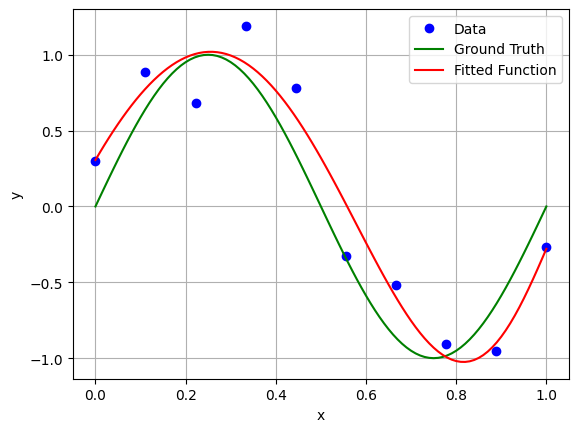

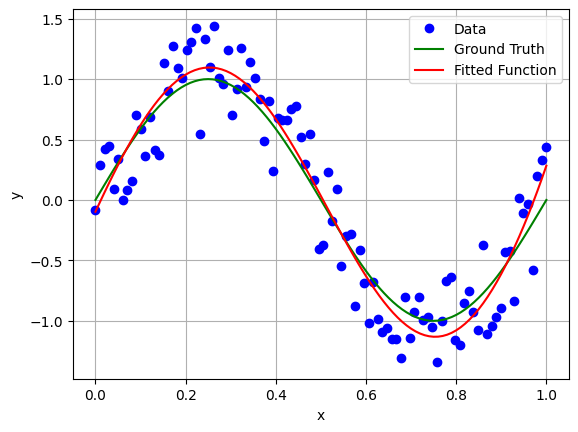

In [5]:
# YOUR CODE GOES HERE


lamda = np.exp(-10)
Im_10 = np.identity(10)
Im_10[-1,-1] = 0

reg_10_9 = lamda *  Im_10 
reg_100_9 = lamda * Im_10 

w_10_9_L2 = np.linalg.inv(X_10_9.T @ X_10_9 + reg_10_9) @ X_10_9.T @ y10.reshape(-1,1)
w_100_9_L2 = np.linalg.inv(X_100_9.T @ X_100_9 + reg_100_9) @ X_100_9.T @ y100.reshape(-1,1)

print(w_10_9_L2)
print(w_100_9_L2)

yr_10_9_L2 = get_9th_design_matrix(xr) @ w_10_9_L2
yr_100_9_L2 = get_9th_design_matrix(xr) @ w_100_9_L2

plot_model(x10,y10,xt,yt,xr,yr_10_9_L2,title = None)
plot_model(x100,y100,xt,yt,xr,yr_100_9_L2,title = None)



## Discussion:

What differences between the regularized and standard 9th order models fit to `d10` do you notice? How does regularization affect the fitted function?

### *Your answer goes here*

With L2 regularization, it is obvious that the overfitting issue is mitigated, resulting in smoother curve. 

## LLS with $L_2$ regularization and gradient descent

For complex models, the size of $X'X$ can be large, making matrix inversion computationally demanding. Instead, one can use gradient descent to compute $w$. In our notes, we derived the gradient descent approach both for unregularized as well as $L_2$ regularized linear regression. The formula for the gradient descent approach with $L_2$ regularization is:  

$ \frac{\partial obj}{\partial w} = X'Xw - X'y + \lambda \mathbb{I}_m w$

$ w^{new} \leftarrow w^{cur} - \alpha \frac{\partial obj}{\partial w}$


In this problem, could gradient descent get stuck in a local minimum? Explain why / why not?

### *Your answer goes here*

No it can't, as the objective is a quatratic function of w in nature, which only contain 1 global minimum. And gradient descent will always get to the minimum with enough iterations.

You will consider just a single case in the following question:

1. Data:  data10.txt, Model: 9th order polynomial.

Starting with a weight vector of zeros as the initial guess, and $\lambda = e^{-10}$, $\alpha = 0.075$, apply 50000 iterations of
gradient descent to find the optimal model parameters. In practice, when you train your own models you will have to determine these parameters yourself!

For the trained model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.


[[-3.85457875]
 [-0.40351789]
 [ 2.81217121]
 [ 4.9128699 ]
 [ 4.63900381]
 [ 0.854452  ]
 [-5.76006075]
 [-9.34031661]
 [ 5.56763369]
 [ 0.29561747]]
(101, 1)


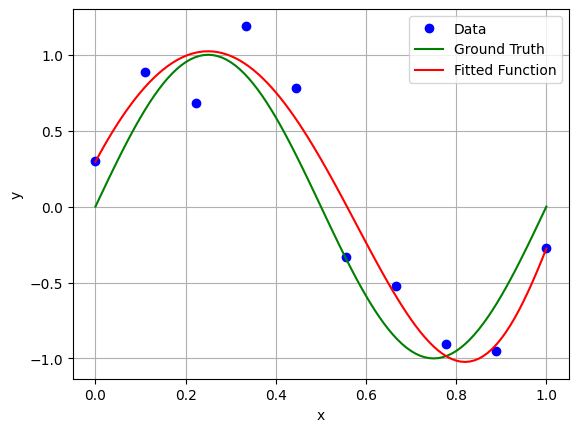

In [6]:
# YOUR CODE GOES HERE
n = 50000
alpha = 0.075
w_cur = np.zeros(10).reshape(10,1)
for i in range(n):
    grad = (X_10_9.T @ X_10_9 @ w_cur) - X_10_9.T @ y10.reshape(-1,1) + lamda * Im_10 @ w_cur
    w_cur = w_cur - alpha*grad
print(w_cur)
yr_10_9_grad = get_9th_design_matrix(xr) @ w_cur
print(yr_10_9_grad.shape)
plot_model(x10,y10,xt,yt,xr,yr_10_9_grad,title = None)

## Discussion:

Visually compare the result you just obtained to the same 9th order polynomial model with $L_2$ regularization where you solved for `w` directly in the previous section. They should be very similar. Comment on whether gradient descent has converged. 

### *Your answer goes here*

Gradient descent has converged as the resulting plot is almost identical to the direct solution. The curve appears to be smooth instead of spiky.